In [70]:
exec(open("functions.py").read())

In [2]:
import numba
import timeit
from numba import config, njit, threading_layer

In [3]:
#%matplotlib notebook

In [4]:
import numpy as np
import matplotlib.pyplot as plt
import math
from mpl_toolkits.mplot3d import Axes3D

from scipy import optimize
from scipy import interpolate
from scipy import linalg
from scipy.integrate import odeint
from scipy import fftpack
from matplotlib import animation, rc
from IPython.display import HTML

In [71]:
M_star = 1.4*msun #[m]   #Mass neutron star
Rs = 2*M_star #[m]
R_star = 12000 #[m]
d = 600*Rs
a = 1e-6

zeta_range=np.linspace(0.001/degrees,90/degrees,31)
mass_range=np.linspace(0.1*msun,2.3*msun,31)
#rstar_range=np.linspace(,,31) #limits will depend on m_star

def multi_planes(M_star,a,d,pixa,pixb,R_star,zeta_range):    
    M = M_star
    Rs = 2*M_star
    frames=[]
    for i in range(len(zeta_range)):
        frames.append(set_final_states(pixa,pixb,zeta_range[i],M,R_star))
    return frames

In [72]:
Frames=multi_planes(M_star,a,d,10,10,R_star,zeta_range)

<string>:301: NumbaWarning: 
Compilation is falling back to object mode WITH looplifting enabled because Function "set_final_states" failed type inference due to: Invalid use of type(CPUDispatcher(<function final_state at 0x7f9e222c9f70>)) with parameters (float64, float64, float64, float64, float64, float64, int64)

During: resolving callee type: type(CPUDispatcher(<function final_state at 0x7f9e222c9f70>))
During: typing of call at <string> (308)


File "<string>", line 308:
<source missing, REPL/exec in use?>

<string>:301: NumbaWarning: 
Compilation is falling back to object mode WITHOUT looplifting enabled because Function "set_final_states" failed type inference due to: cannot determine Numba type of <class 'numba.core.dispatcher.LiftedLoop'>

File "<string>", line 306:
<source missing, REPL/exec in use?>

/opt/anaconda3/lib/python3.8/site-packages/numba/core/object_mode_passes.py:177: NumbaWarning: Function "set_final_states" was compiled in object mode without forceobj=True, bu

In [73]:
len(Frames)

31

In [74]:
Frames[10]

array([[-1.92000000e+04, -1.92000000e+04,  5.00958529e+06,
         2.47636474e+06,  2.30101828e+00, -3.51007246e+00,
         9.99932530e-01, -3.89780661e-09],
       [-1.49333333e+04, -1.92000000e+04,  5.01108308e+06,
         2.47616277e+06,  2.21939013e+00, -3.48734579e+00,
         9.99944498e-01, -3.66136895e-09],
       [-1.06666667e+04, -1.92000000e+04,  5.01258521e+06,
         2.47594387e+06,  2.12482820e+00, -3.43451381e+00,
         9.99953927e-01, -3.43409539e-09],
       [-6.40000000e+03, -1.92000000e+04,  5.01389184e+06,
         2.47573672e+06,  2.03204927e+00, -3.34293867e+00,
         9.99960484e-01, -3.25048786e-09],
       [-2.13333333e+03, -1.92000000e+04,  5.01468623e+06,
         2.47560639e+06,  1.97083265e+00, -3.21412901e+00,
         9.99965617e-01, -3.14687743e-09],
       [ 2.13333333e+03, -1.92000000e+04,  5.01468623e+06,
         2.47560639e+06,  1.97083265e+00,  3.21412901e+00,
         9.99965617e-01, -3.14687743e-09],
       [ 6.40000000e+03, -1.920000

In [75]:
def plot_gridline(Frame):
    Frame_hit=Frame[Frame[:,3]<=1.001*R_star]
    Frame_theta=Frame_hit[(myround(Frame_hit[:,4]*degrees)%18)[:]==0]
    Frame_phi=Frame_hit[(myround(Frame_hit[:,5]*degrees)%18)[:]==0]

    fig = plt.figure(figsize=(6,6))
    ax=plt.subplot()
    alpha_plot_hit_theta=Frame_theta[:,0]
    beta_plot_hit_theta=Frame_theta[:,1]
    alpha_plot_hit_phi=Frame_phi[:,0]
    beta_plot_hit_phi=Frame_phi[:,1]
    plt.scatter(alpha_plot_hit_theta,beta_plot_hit_theta,c='royalblue',s=1)
    plt.scatter(alpha_plot_hit_phi,beta_plot_hit_phi,c='royalblue',s=1)
    ax.set_xlabel('alpha$_0$',fontsize=12)
    ax.set_ylabel('beta$_0$',fontsize=12)
    ax.xaxis.set_tick_params(labelsize=12)
    ax.yaxis.set_tick_params(labelsize=12)

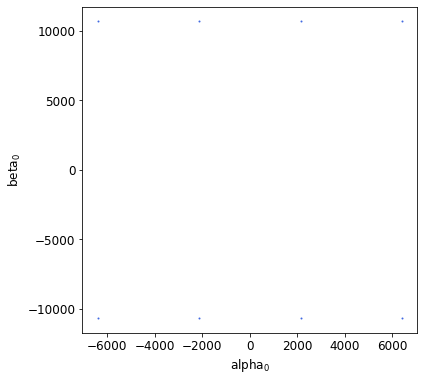

In [79]:
plot_gridline(Frames[30])

In [112]:
def animate_gridline(i,M_star,zeta_range,pixa,pixb,R_star,set_final_states):
    M = M_star
    Rs = 2*M_star
    zeta_0=zeta_range[i]
    single_frame = set_final_states(pixa,pixb,zeta_0,M,R_star)
    
    Frame=single_frame
    
    Frame_hit=Frame[Frame[:,3]<=1.001*R_star]
    Frame_theta=Frame_hit[(myround(Frame_hit[:,4]*degrees)%18)[:]==0]
    Frame_phi=Frame_hit[(myround(Frame_hit[:,5]*degrees)%18)[:]==0]
    
    Frame_grid= Frame_theta + Frame_phi
    
    fig = plt.figure(figsize=(6,6))
    ax=plt.subplot()
    #alpha_plot_hit_theta=Frame_theta[:,0]
    #beta_plot_hit_theta=Frame_theta[:,1]
    #alpha_plot_hit_phi=Frame_phi[:,0]
    #beta_plot_hit_phi=Frame_phi[:,1]
    #plt.scatter(alpha_plot_hit_theta,beta_plot_hit_theta,c='royalblue',s=1)
    #plt.scatter(alpha_plot_hit_phi,beta_plot_hit_phi,c='royalblue',s=1)
    alpha_plot_hit=Frame_grid[:,0]
    beta_plot_hit=Frame_grid[:,1]
    grid=plt.scatter(alpha_plot_hit,beta_plot_hit,c='royalblue',s=1)
    ax.set_xlabel('alpha$_0$',fontsize=12)
    ax.set_ylabel('beta$_0$',fontsize=12)
    ax.xaxis.set_tick_params(labelsize=12)
    ax.yaxis.set_tick_params(labelsize=12)
    ax.set_xlim([-1.5*R_star,1.5*R_star])
    ax.set_ylim([-1.5*R_star,1.5*R_star])
    return grid,

(<matplotlib.collections.PathCollection at 0x7f9e23971700>,)

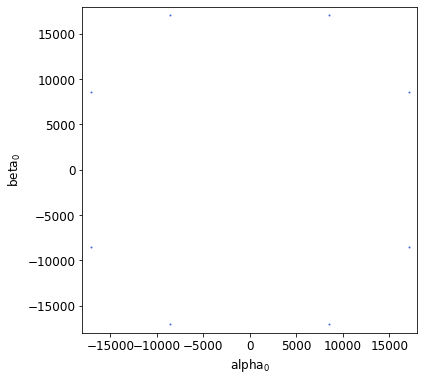

In [113]:
animate_gridline(0,M_star,zeta_range,10,10,R_star,set_final_states)

ValueError: operands could not be broadcast together with shapes (2,8) (4,8) 

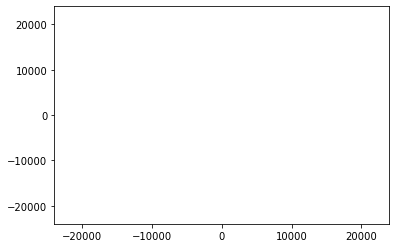

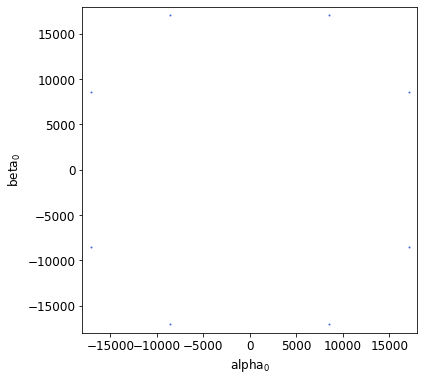

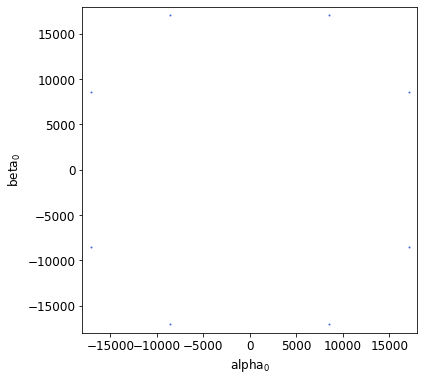

In [114]:
fig = plt.figure()
ax = plt.axes(xlim=(-2*R_star, 2*R_star), ylim=(-2*R_star,2*R_star))
cmap=plt.cm.get_cmap('Spectral')
anim = animation.FuncAnimation(fig,animate_gridline,fargs=(M_star,zeta_range,10,10,R_star,set_final_states),frames=31,interval=31,blit=False)
anim.save('sin_movie.mp4', fps=30, extra_args=['-vcodec', 'libx264'])

In [ ]:
HTML(anim.to_html5_video())

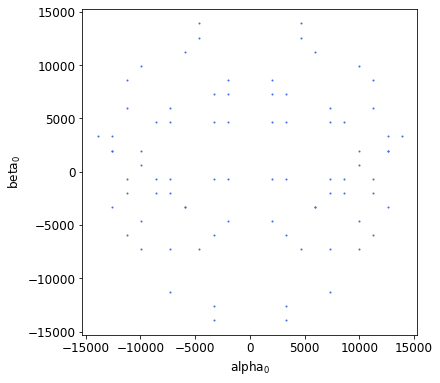

In [59]:
Frame=Frames[10]
    
Frame_hit=Frame[Frame[:,3]<=1.001*R_star]
Frame_theta=Frame_hit[(myround(Frame_hit[:,4]*degrees)%18)[:]==0]
Frame_phi=Frame_hit[(myround(Frame_hit[:,5]*degrees)%18)[:]==0]
    
fig = plt.figure(figsize=(6,6))
ax=plt.subplot()
alpha_plot_hit_theta=Frame_theta[:,0]
beta_plot_hit_theta=Frame_theta[:,1]
alpha_plot_hit_phi=Frame_phi[:,0]
beta_plot_hit_phi=Frame_phi[:,1]
plt.scatter(alpha_plot_hit_theta,beta_plot_hit_theta,c='royalblue',s=1)
plt.scatter(alpha_plot_hit_phi,beta_plot_hit_phi,c='royalblue',s=1)
ax.set_xlabel('alpha$_0$',fontsize=12)
ax.set_ylabel('beta$_0$',fontsize=12)
ax.xaxis.set_tick_params(labelsize=12)
ax.yaxis.set_tick_params(labelsize=12)

In [5]:
omegamax=5
frmax=50


def animate(i,omegamax,frmax):
    p2=2.0*np.pi
    ax.clear()
    plt.xlim(0.0,p2)    # Set x limits
    plt.ylim(-1,1)        # Set y limits
    omega=i/frmax*omegamax
    xdata=np.linspace(0,p2,100)
    ydata=np.sin(omega*xdata)
    clr=cmap(i/frmax)
    line=ax.plot(xdata,ydata,marker='',linestyle='-',color=clr,markersize=1.0,lw=4)
    return line,

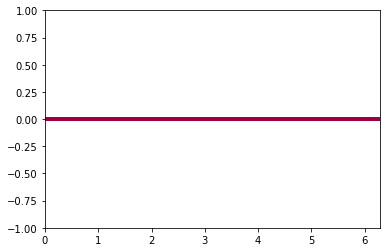

In [6]:
fig = plt.figure()
p2=2.0*np.pi
ax = plt.axes(xlim=(0, p2), ylim=(-1,1))
#line,=ax.plot([], [], lw=2)

anim = animation.FuncAnimation(fig,animate,fargs=(omegamax,frmax),frames=frmax,interval=50,blit=False)
anim.save('sin_movie.mp4', fps=30, extra_args=['-vcodec', 'libx264'])

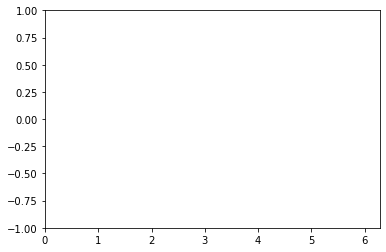

In [7]:
HTML(anim.to_html5_video())

In [4]:
# demonstrate the threading layer chosen
print("Threading layer chosen: %s" % threading_layer())

ValueError: Threading layer is not initialized.

In [5]:
print(numba.get_num_threads())

8


In [6]:
@njit(parallel=True)
def ident_parallel(x):
    return np.cos(x) ** 2 + np.sin(x) ** 2

In [7]:
@njit(parallel=False)
def ident(x):
    return np.cos(x) ** 2 + np.sin(x) ** 2

In [10]:
%timeit ident_parallel(10)

138 ns ± 1.98 ns per loop (mean ± std. dev. of 7 runs, 10000000 loops each)


In [9]:
%timeit ident(10)

139 ns ± 1.85 ns per loop (mean ± std. dev. of 7 runs, 10000000 loops each)


In [18]:
M_star = 1.4*msun #[m]   #Mass neutron star
Rs = 2*M_star #[m]
R_star = 12000 #[m]
d = 600*Rs
M = M_star
a = 1e-6

In [ ]:
alpha_0 = 20*30**0.5 #[m]
beta_0 = 20*30**0.5 #[m]
zeta_0 = 0/degrees

In [ ]:
alpha_0 = R_star #[m]
beta_0 = 0 #[m]
zeta_0 = 0.1/degrees

In [19]:
alpha_0 = R_star #[m]
beta_0 = 0 #[m]
zeta_0 = 90/degrees

In [ ]:
alpha_0 = R_star
beta_0 = 0
zeta_0 = 53.85/degrees

In [ ]:
alpha_0 = -0.005*d
beta_0 = 0.005*d
zeta_0 = 53.85/degrees

In [20]:
y_initial = initial(d,alpha_0,beta_0,zeta_0)
b = imp_par(d,alpha_0,beta_0,zeta_0,M,a)

In [6]:
#yarr=solve_ivp(trajectory,[0,1.001*d],y_initial,args=(M,a,b),method='RK23',dense_output=True,events=star)
#yarr=solve_ivp(trajectory,[0,1.001*d],y_initial,args=(M,a,b),method='DOP853',dense_output=True,events=star)
#yarr=solve_ivp(trajectory,[0,1.001*d],y_initial,args=(M,a,b),method='Radau',dense_output=True,events=star)
#yarr=solve_ivp(trajectory,[0,1.001*d],y_initial,args=(M,a,b),method='BDF',dense_output=True,events=star)
#yarr=solve_ivp(trajectory,[0,1.001*d],y_initial,args=(M,a,b),method='LSODA',dense_output=True,events=star)
yarr=solve_ivp(trajectory,[0,2*d],y_initial,args=(M,a,b),method='RK45',atol=1e-10,rtol=1e-10,dense_output=True,events=star)

In [7]:
#fig = plt.figure(figsize=(6,6))
#ax = Axes3D(fig)
#ax.scatter(yarr.y[1,:], yarr.y[2,:], yarr.y[3,:], c='b', marker='.')
#ax.set_xlabel('$r$')
#ax.set_ylabel('$theta$')
#ax.set_zlabel('$phi$')
#ax.view_init(30, 45)

In [8]:
#fig = plt.figure(figsize=(6,6))
#ax = Axes3D(fig)
#ax.scatter(yarr_new[1,:], yarr_new[2,:], yarr_new[3,:], c='b', marker='.')
#ax.set_xlabel('$r$')
#ax.set_ylabel('$theta$')
#ax.set_zlabel('$phi$')
#ax.view_init(30, 45)

In [9]:
#plt.plot(time_vec,X)

In [10]:
#plt.plot(time_vec,Y)

In [11]:
#plt.plot(time_vec,Z)

In [12]:
#fig = plt.figure(figsize=(6,6))
#ax = fig.add_subplot(111, projection='3d')
#ax.plot_surface(x_sphere, y_sphere, z_sphere,  rstride=1, cstride=1, color='c', alpha=0.3, linewidth=0)
#ax.scatter(X,Y,Z, c='b', marker='.')
#ax.set_xlim([-R_star,R_star])
#ax.set_ylim([-R_star,R_star])
#ax.set_zlim([-R_star,Z[0]])
#ax.set_xlabel('$x$')
#ax.set_ylabel('$y$')
#ax.set_zlabel('$z$')
#ax.view_init(30, 45)
#plt.tight_layout()

In [13]:
#fig = plt.figure(figsize=(6,6))
#ax = fig.add_subplot(111, projection='3d')
#ax.plot_surface(x_sphere, y_sphere, z_sphere,  rstride=1, cstride=1, color='c', alpha=0.3, linewidth=0)
#ax.scatter(X,Y,Z, c='b', marker='.')
#ax.set_xlim([-R_star,R_star])
#ax.set_ylim([-R_star,R_star])
#ax.set_zlim([-R_star,R_star])
#ax.set_xlabel('$x$')
#ax.set_ylabel('$y$')
#ax.set_zlabel('$z$')
#ax.view_init(30, 45)
#plt.tight_layout()

In [14]:
#xi(yarr_new[:,-1]) #testing xi at the last part of trajectory

In [15]:
#xi_vec=[]
#for i in range(len(yarr_new[0])):
#    xi_vec.append(xi_vals(yarr_new[:,i]))

In [16]:
#plt.plot(xi_vec,X)

In [17]:
#alpha_vec=np.linspace(-2*R_star, 2*R_star,50)
#beta_vec=np.linspace(-2*R_star, 2*R_star,51)
#obspln=[]
#for j in range(len(beta_vec)):
#    for i in range(len(alpha_vec)):
#        obspln.append((alpha_vec[i],beta_vec[j]))

In [18]:
#final_state(M,a,d,alpha_0,beta_0,zeta_0)

In [19]:
#run 300X300 or 400x400 overnight and time it!
#parallelize loops

In [ ]:
#Mass will be 0.1<M<2.3 
#Zeta 0<zeta<90

In [22]:
test=set_final_states(100,100,zeta_0)

In [ ]:
#matplotlib.annimation
#movie.py

In [26]:
#test=set_final_states(400,400)

In [ ]:
exec(open("functions.py").read())

In [97]:
test_miss=test[test[:,3]>1.001*R_star]
test_hit=test[test[:,3]<=1.001*R_star]
test_theta=test_hit[(myround(test_hit[:,4]*degrees)%18)[:]==0]
test_phi=test_hit[(myround(test_hit[:,5]*degrees)%18)[:]==0]

plot_gridline()

<IPython.core.display.Javascript object>


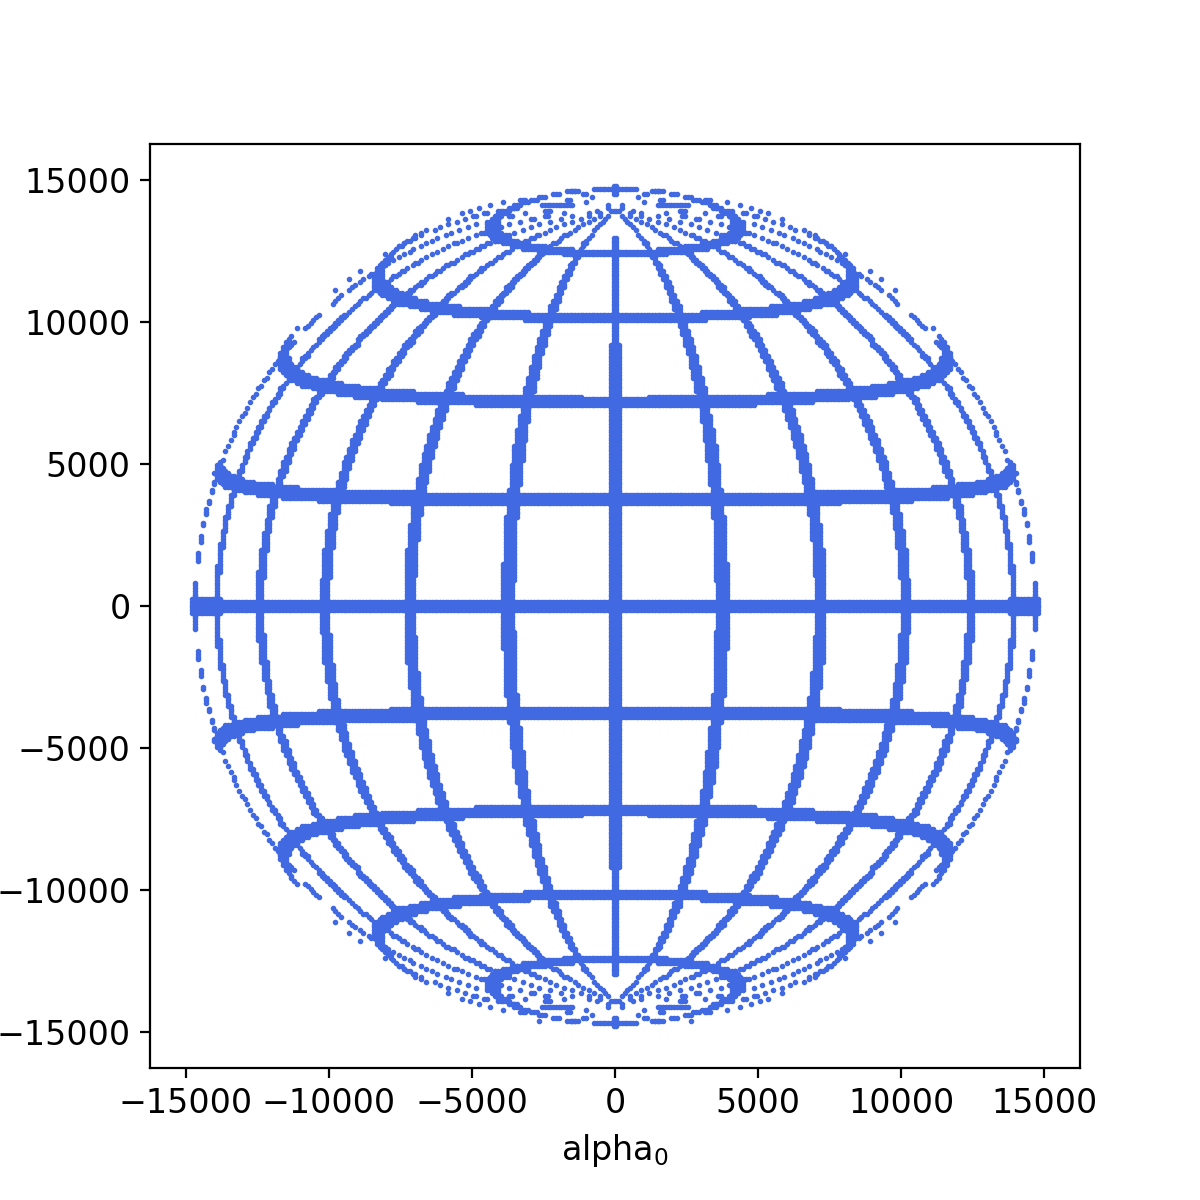

In [100]:
plot_gridline()

<IPython.core.display.Javascript object>


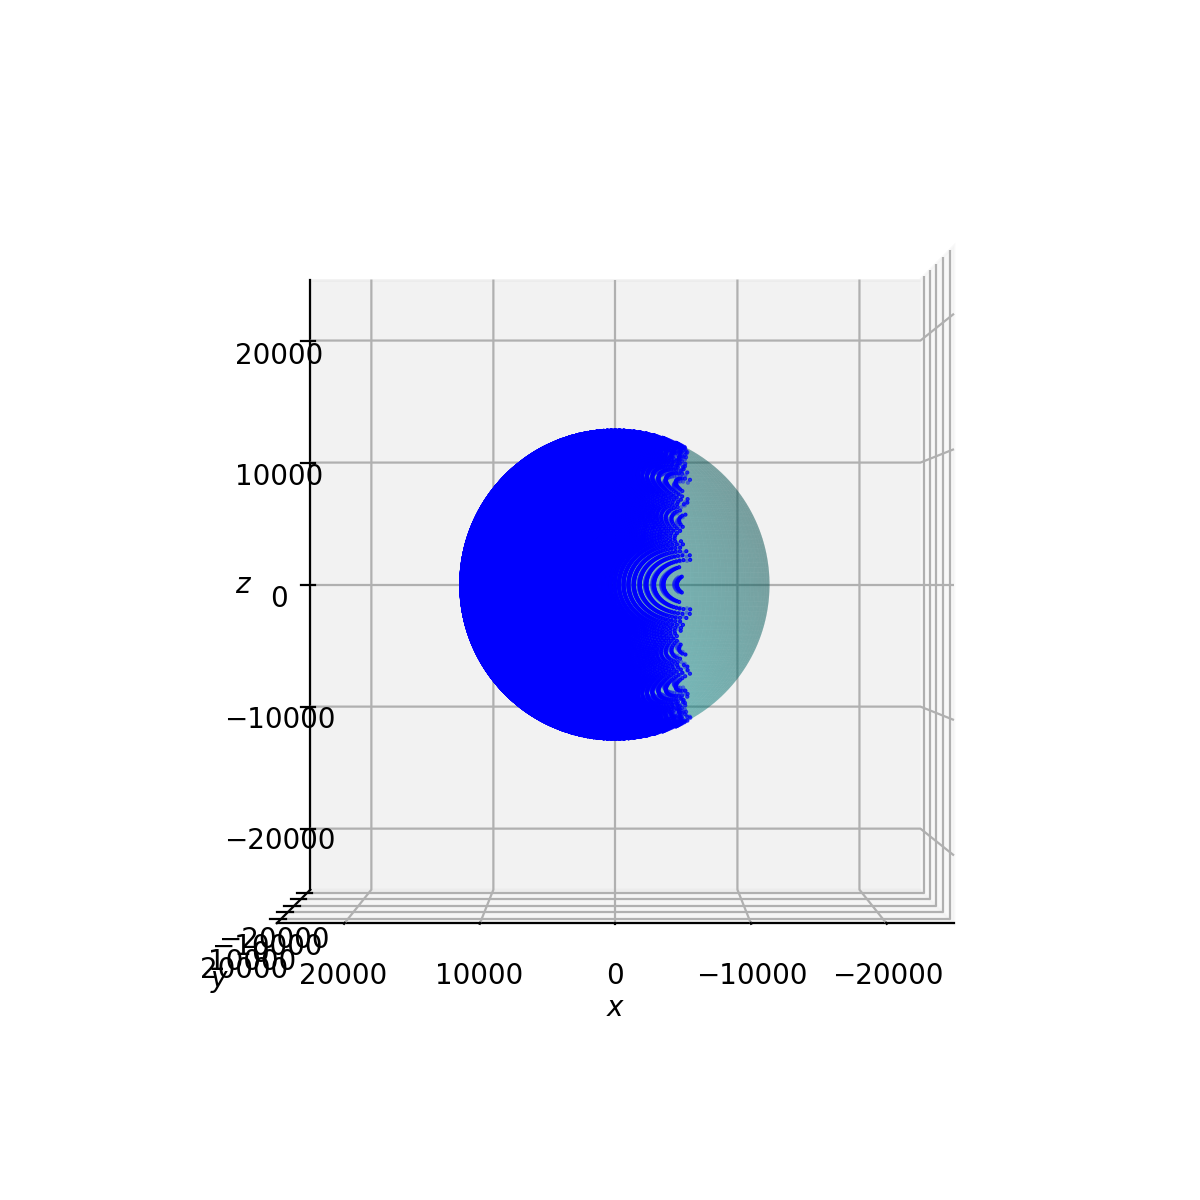

In [98]:
plot_star()

<IPython.core.display.Javascript object>


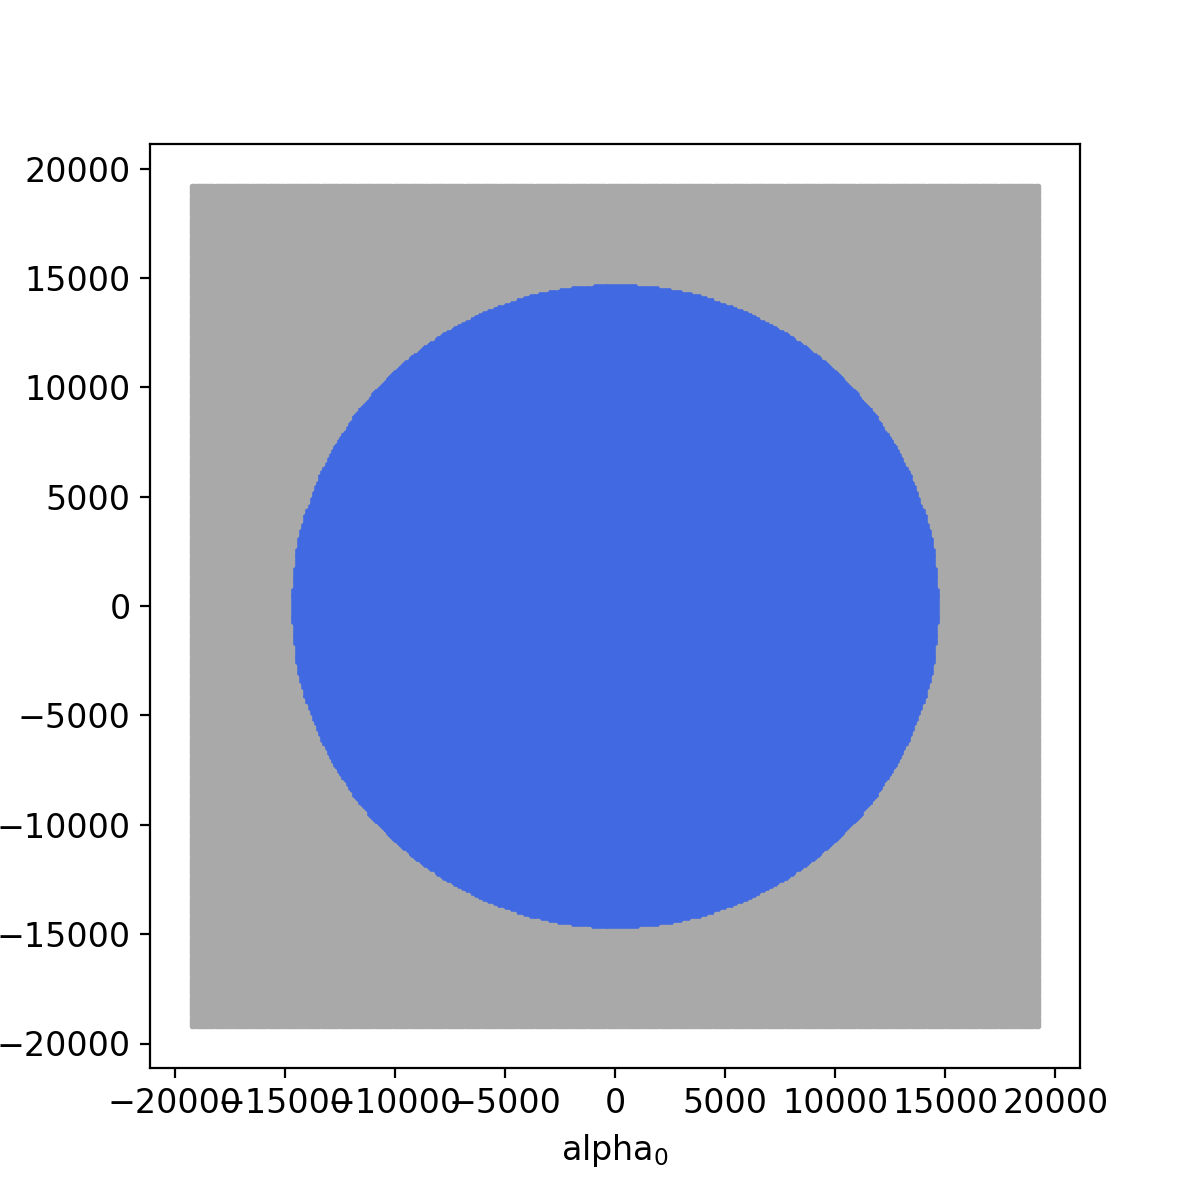

In [99]:
plot_hits()

In [ ]:
#condlist=[test[:,3]<=1.001*R_star]
#choicelist=[test[:,3]]
#np.select(condlist, choicelist)

In [ ]:
#condlist=[test[:,3]>1.001*R_star]
#choicelist=[test[:,3]]
#np.select(condlist, choicelist)

In [ ]:
plot_trajectory(M,a,d,alpha_0,beta_0,zeta_0)

In [ ]:
fig = plt.figure(figsize=(6,6))
ax = fig.add_subplot(111, projection='3d')
ax.plot_surface(x_sphere, y_sphere, z_sphere,  rstride=1, cstride=1, color='c', alpha=0.3, linewidth=0)
ax.scatter(X,Y,Z, c='b', marker='.')
ax.set_xlim([-R_star,R_star])
ax.set_ylim([-R_star,R_star])
ax.set_zlim([-R_star,R_star])
ax.set_xlabel('$x$')
ax.set_ylabel('$y$')
ax.set_zlabel('$z$')
ax.view_init(30, 0)
plt.tight_layout()
#plt.show()

In [ ]:
#xi_vec=[]
#for i in range(len(yarr_new[0])):
#    xi_vec.append(xi_vals(yarr_new[:,i]))

In [ ]:
#ax=plt.subplot()
#plt.plot(time_vec,xi_vec)
#ax.set_ylim([-1.00001,-0.99999])

In [ ]:
#yarr_new[:,-1] #t,r,th,ph,kr,kth

In [ ]:
#yarr_test=yarr.sol(2e6)
#yarr_test #t,r,th,ph,kr,kth